_Neural Data Science_

Lecturer: Jan Lause, Prof. Dr. Philipp Berens

Tutors: Jonas Beck, Rita González Márquez, Fabio Seel

Summer term 2024

Student name: FILL IN YOUR NAMES HERE

# Coding Lab 3

- __Data__: Download the data file ```nds_cl_3_*.csv``` from ILIAS and save it in a subfolder ```../data/```.
- __Dependencies__: You don't have to use the exact versions of all the dependencies in this notebook, as long as they are new enough. But if you run "Run All" in Jupyter and the boilerplate code breaks, you probably need to upgrade them.

Two-photon imaging is widely used to study computations in populations of neurons. In this exercise sheet we will study properties of different indicators and work on methods to infer spikes from calcium traces. All data is provided at a sampling rate of 100 Hz. For analysis, please resample it to 25 Hz using `scipy.signal.decimate`.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
from scipy.io import loadmat
from __future__ import annotations

%matplotlib inline

%load_ext jupyter_black

%load_ext watermark
%watermark --time --date --timezone --updated --python --iversions --watermark -p sklearn

Last updated: 2024-05-19 19:39:40CEST

Python implementation: CPython
Python version       : 3.12.2
IPython version      : 8.22.2

sklearn: 1.4.1.post1

numpy     : 1.26.4
pandas    : 2.2.1
seaborn   : 0.13.2
matplotlib: 3.8.3
scipy     : 1.12.0

Watermark: 2.4.3



In [3]:
plt.style.use("../matplotlib_style.txt")

## Load data

In [4]:
# ogb dataset from Theis et al. 2016 Neuron
ogb_calcium = pd.read_csv("../data/nds_cl_3_ogb_calcium.csv", header=0)
ogb_spikes = pd.read_csv("../data/nds_cl_3_ogb_spikes.csv", header=0)

# gcamp dataset from Chen et al. 2013 Nature
gcamp_calcium = pd.read_csv("../data/nds_cl_3_gcamp2_calcium.csv", header=0)
gcamp_spikes = pd.read_csv("../data/nds_cl_3_gcamp2_spikes.csv", header=0)

In [5]:
ogb_calcium.shape, ogb_spikes.shape, gcamp_calcium.shape, gcamp_spikes.shape

((71986, 11), (71986, 11), (23973, 37), (23973, 37))

In [6]:
ogb_spikes.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0,0,0.0,0.0,0,0,0,0.0,0,0.0,0
1,0,0,0.0,0.0,0,1,0,0.0,0,0.0,0
2,0,0,0.0,0.0,0,0,0,0.0,0,0.0,0
3,0,0,0.0,0.0,0,1,0,0.0,0,0.0,0
4,0,0,0.0,0.0,0,0,0,0.0,0,0.0,0


In [7]:
sampling_rate = 100  # Hz
timeline_ogb = np.arange(0, ogb_calcium.shape[0] / sampling_rate, 1 / sampling_rate)
timeline_gcamp = np.arange(0, gcamp_calcium.shape[0] / sampling_rate, 1 / sampling_rate)

## Task 1: Visualization of calcium and spike recordings

We start again by plotting the raw data - calcium and spike traces in this case. One dataset has been recorded using the synthetic calcium indicator OGB-1 at population imaging zoom (~100 cells in a field of view) and the other one using the genetically encoded indicator GCamp6f zooming in on individual cells. Plot the traces of an example cell from each dataset to show how spikes and calcium signals are related. A good example cell for the OGB-dataset is cell 5. For the CGamp-dataset a good example is cell 6. Zoom in on a small segment of tens of seconds and offset the traces such that a valid comparison is possible.

*Grading: 2 pts*

/var/folders/g_/dvk6nf6n4w71vr5_mf4f1zdm0000gn/T/ipykernel_2029/3990825665.py:38: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


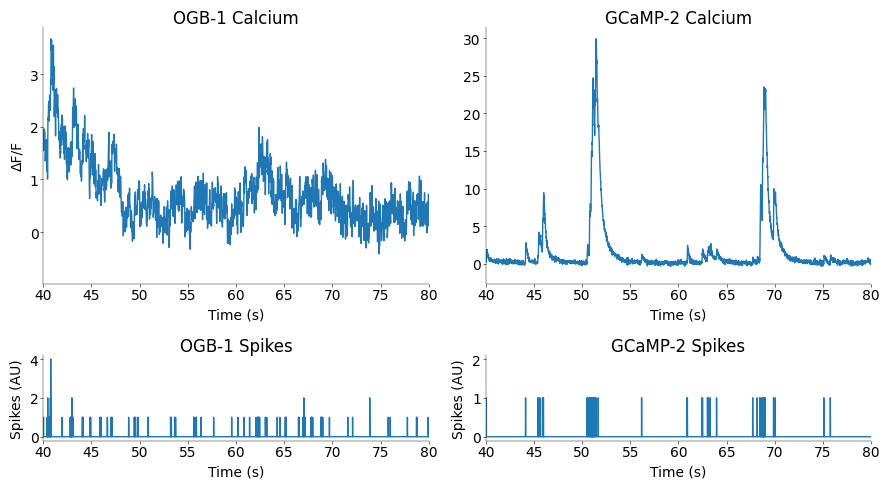

ΔF/F


In [8]:
# ----------------------------
# Plot raw calcium data (1 pt)
# ----------------------------


# --------------------------
# Plot raw spike data (1 pt)
# --------------------------

fig, axs = plt.subplots(
    2, 2, figsize=(9, 5), height_ratios=[3, 1], layout="constrained"
)

axs[0, 0].plot(timeline_ogb, ogb_calcium["5"], label="OGB-1")
axs[0, 0].set_title("OGB-1 Calcium")
axs[0, 0].set_ylabel("\u0394" + "F/F")
axs[0, 0].set_xlabel("Time (s)")
axs[0, 0].set_xlim([40, 80])

axs[0, 1].plot(timeline_gcamp, gcamp_calcium["6"], label="GCaMP-2")
axs[0, 1].set_title("GCaMP-2 Calcium")
axs[0, 1].set_ylabel("")
axs[0, 1].set_xlabel("Time (s)")
axs[0, 1].set_xlim([40, 80])

axs[1, 0].plot(timeline_ogb, ogb_spikes["5"], label="OGB-1")
axs[1, 0].set_title("OGB-1 Spikes")
axs[1, 0].set_ylabel("Spikes (AU)")
axs[1, 0].set_xlabel("Time (s)")
axs[1, 0].set_xlim([40, 80])

axs[1, 1].plot(timeline_gcamp, gcamp_spikes["6"], label="GCaMP-2")
axs[1, 1].set_title("GCaMP-2 Spikes")
axs[1, 1].set_ylabel("Spikes (AU)")
axs[1, 1].set_xlabel("Time (s)")
axs[1, 1].set_xlim([40, 80])

plt.tight_layout()
plt.show()


# print greek delta F/F
print("\u0394" + "F/F")

# plot raw ogb data


# plot raw gcamp data

Resampling


In [9]:
# resample data to 25 Hz
resample_rate = 25

ogb_calcium_resampled = signal.decimate(ogb_calcium, 4, axis=0)
gcamp_calcium_resampled = signal.decimate(gcamp_calcium, 4, axis=0)
ogb_spikes_resampled = signal.decimate(ogb_spikes, 4, axis=0)
gcamp_spikes_resampled = signal.decimate(gcamp_spikes, 4, axis=0)


print(
    ogb_calcium_resampled.shape,
    gcamp_calcium_resampled.shape,
)

timeline_ogb_resampled = np.arange(
    0, ogb_calcium_resampled.shape[0] / resample_rate, 1 / resample_rate
)

print(timeline_ogb_resampled.shape)

timeline_gcamp_resampled = np.arange(
    0, gcamp_calcium_resampled.shape[0] / resample_rate, 1 / resample_rate
)

(17997, 11) (5994, 37)
(17997,)


/var/folders/g_/dvk6nf6n4w71vr5_mf4f1zdm0000gn/T/ipykernel_2029/4097673359.py:29: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


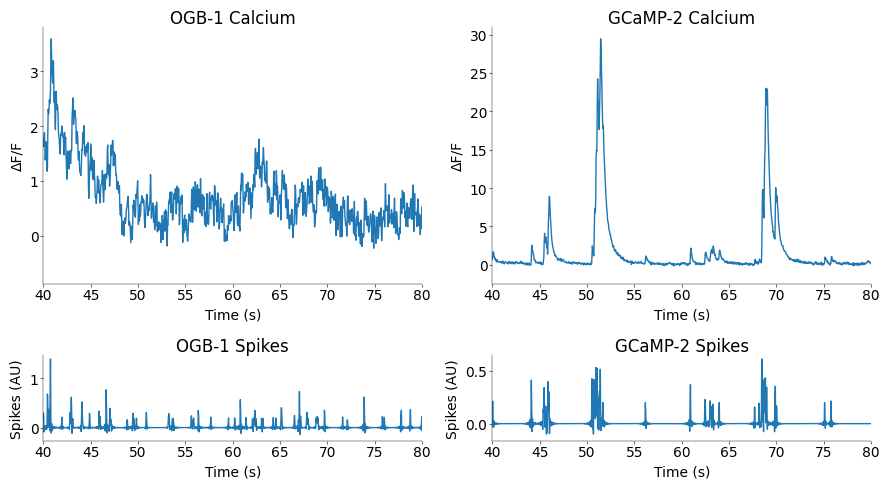

In [10]:
fig, axs = plt.subplots(
    2, 2, figsize=(9, 5), height_ratios=[3, 1], layout="constrained"
)

axs[0, 0].plot(timeline_ogb_resampled, ogb_calcium_resampled[:, 5], label="OGB-1")
axs[0, 0].set_title("OGB-1 Calcium")
axs[0, 0].set_ylabel("\u0394" + "F/F")
axs[0, 0].set_xlabel("Time (s)")
axs[0, 0].set_xlim([40, 80])

axs[0, 1].plot(timeline_gcamp_resampled, gcamp_calcium_resampled[:, 6], label="GCaMP-2")
axs[0, 1].set_title("GCaMP-2 Calcium")
axs[0, 1].set_ylabel("\u0394" + "F/F")
axs[0, 1].set_xlabel("Time (s)")
axs[0, 1].set_xlim([40, 80])

axs[1, 0].plot(timeline_ogb_resampled, ogb_spikes_resampled[:, 5], label="OGB-1")
axs[1, 0].set_title("OGB-1 Spikes")
axs[1, 0].set_ylabel("Spikes (AU)")
axs[1, 0].set_xlabel("Time (s)")
axs[1, 0].set_xlim([40, 80])

axs[1, 1].plot(timeline_gcamp_resampled, gcamp_spikes_resampled[:, 6], label="GCaMP-2")
axs[1, 1].set_title("GCaMP-2 Spikes")
axs[1, 1].set_ylabel("Spikes (AU)")
axs[1, 1].set_xlabel("Time (s)")
axs[1, 1].set_xlim([40, 80])

plt.tight_layout()
plt.show()

## Task 2: Simple deconvolution

It is clear from the above plots that the calcium events happen in relationship to the spikes. As a first simple algorithm implement a deconvolution approach like presented in the lecture in the function `deconv_ca`. Assume an exponential kernel where the decay constant depends on the indicator ($\tau_{OGB}= 0.5 s$, $\tau_{GCaMP}= 0.1 s$). As we know that there can be no negative rates, apply a heavyside function to the output. Plot the kernel as well as an example cell with true and deconvolved spike rates. Scale the signals such as to facilitate comparisons. You can use functions from `scipy` for this.

*Grading: 3 pts*


#### Apply low pass filter to data

In [11]:
# set cutoff to 0.2 times the frame rate as in the paper
cutoff = 0.2 * resample_rate

b, a = signal.butter(2, cutoff, btype="low", fs=resample_rate)

# filter the data
ogb_calcium_filtered = signal.filtfilt(b, a, ogb_calcium_resampled, axis=0)
gcamp_calcium_filtered = signal.filtfilt(b, a, gcamp_calcium_resampled, axis=0)

#### Plot filtered data

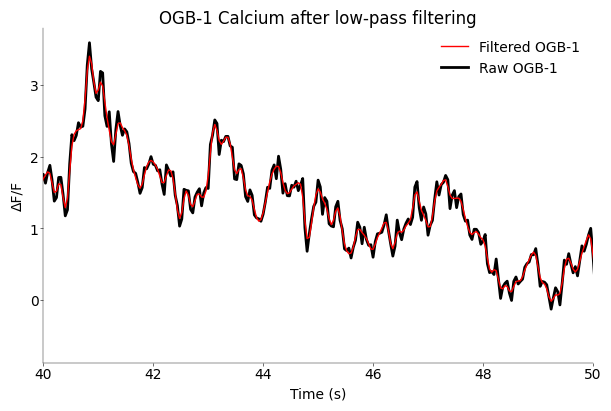

In [124]:
# plot filtered ogb data
fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(
    timeline_ogb_resampled,
    ogb_calcium_filtered[:, 5],
    label="Filtered OGB-1",
    linewidth=1,
    color="red",
    zorder=10,
    alpha=1,
)
ax.set_title("Filtered OGB-1 Calcium")
ax.set_ylabel("\u0394" + "F/F")
ax.set_xlabel("Time (s)")
ax.set_xlim([40, 50])

# plot filtered gcamp data
ax.plot(
    timeline_ogb_resampled,
    ogb_calcium_resampled[:, 5],
    label="Raw OGB-1",
    zorder=5,
    alpha=1,
    linewidth=2,
    color="black",
)
ax.set_title("OGB-1 Calcium after low-pass filtering")
ax.set_ylabel("\u0394" + "F/F")
ax.set_xlabel("Time (s)")
plt.legend()

#### Define the smoothing function (as in the paper)

In [130]:
def smoothen_signal(x, thrd, iterations=5000):
    """Smoothen signal by averaging over local extrema as described in the paper. Note sure if this works as intended tho :D

    Parameters
    ----------
    x : array-like
        Signal to smoothen
    thrd : float
        Threshold for peak amplitudes

    iterations : int
        Maximum number of iterations

    Returns
    -------
    smoothened_sample : array-like
        Smoothened signal

    """

    smoothened_sample = np.copy(
        x
    )  # this is unnecessary, but I like to keep the original signal

    for iteration in range(iterations):

        # find peaks and troughs (extrema) in the signal

        peak_indices = signal.find_peaks(smoothened_sample, threshold=None)[
            0
        ]  # find peaks
        trough_indices = signal.find_peaks(-smoothened_sample, threshold=None)[
            0
        ]  # find troughs
        extremum_indices = np.concatenate(
            [peak_indices, trough_indices]
        )  # combine peaks and troughs
        extremum_indices.sort()

        # find minimal amplitude between the extrema

        min_amp = 999999  # set to a high value
        for i in range(1, len(extremum_indices)):

            extrema_amp = np.abs(
                smoothened_sample[extremum_indices[i]]
                - smoothened_sample[extremum_indices[i - 1]]
            )  # calculate amplitude between extrema

            if (
                extrema_amp < min_amp
            ):  # if amplitude is smaller than the current minimum, update the minimum
                min_amp = extrema_amp
                min_amp_index = i  # save the index of the minimum amplitude

        if min_amp > thrd:
            break  # if the minimum amplitude is larger than the threshold, break the loop, because the signal is already smooth enough

        before_smoothing = np.copy(
            smoothened_sample
        )  # this was used for plotting and checking the smoothing process

        # smoothing applied 3 times to the signal

        for i in range(3):
            minimal_local_extremum_index = extremum_indices[
                min_amp_index
            ]  # get the index of the minimal amplitude
            preceding_extremum_index = (
                extremum_indices[min_amp_index - 1] if min_amp_index - 1 >= 0 else 0
            )  # get the index of the preceding extremum

            next_extremum_index = (
                extremum_indices[min_amp_index + 1]
                if min_amp_index + 1 < len(extremum_indices)
                else len(smoothened_sample) - 1
            )  # get the index of the next extremum

            window_avg = np.mean(
                smoothened_sample[preceding_extremum_index : next_extremum_index + 1]
            )  # calculate the average of the window between the preceding and next extremum

            smoothened_sample[preceding_extremum_index : next_extremum_index + 1] = (
                window_avg  # replace the values in the window with the average
            )

    return smoothened_sample

#### Apply the smoothing function to the data

In [131]:
ogb_calcium_filtered_smoothed = smoothen_signal(
    ogb_calcium_filtered[:, 5], 0.5
)  # in the paper the threshold is 1, but i am not sure what were the units of the signal. 0.5 seems to work

#### Plot the smoothed data in comparison to the filtered data

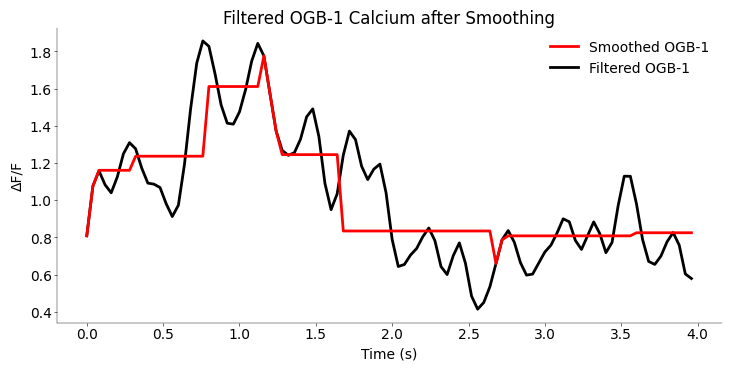

In [132]:
plt.plot(
    timeline_ogb_resampled[0:100],
    ogb_calcium_filtered_smoothed[0:100],
    label="Smoothed OGB-1",
    color="red",
    zorder=10,
    linewidth=2,
)

plt.plot(
    timeline_ogb_resampled[0:100],
    ogb_calcium_filtered[:, 5][0:100],
    label="Filtered OGB-1",
    color="black",
    zorder=5,
    linewidth=2,
)


plt.xlabel("Time (s)")
plt.ylabel("\u0394" + "F/F")
plt.title("Filtered OGB-1 Calcium after Smoothing")
plt.legend()
plt.show()

#### Create the deconvolution function

In [133]:
def deconv_ca(ca: np.ndarray, tau: float, dt: float) -> np.ndarray:
    """Compute the deconvolution of the calcium signal.

    Parameters
    ----------

    ca: np.array, (n_points,)
        Calcium trace

    tau: float
        decay constant of conv kernel in seconds.

    dt: float
        sampling interval = 1m / sampling rate in Hz.

    Return
    ------

    sp_hat: np.array
    """

    # insert your code here

    # --------------------------------------------
    # apply devonvolution to calcium signal (1 pt)
    # --------------------------------------------
    # 'We then deconvolved traces linearly by inverse filtering using a kernel y = exp(-t/decay), truncated at t = 2*decay where t is time'

    decay = tau

    n = len(ca)

    t = np.arange(0, 10 * decay, dt)

    kernel = np.exp(-t / decay)
    # kernel = kernel / np.sum(kernel)
    sp_hat, _ = signal.deconvolve(ca, kernel)
    print(sp_hat)
    sp_hat[sp_hat < 0] = 0

    return sp_hat, kernel, t

In [16]:
# -------------------------
# Plot the 2 kernels (1 pt)
# -------------------------

#### Compute the deconvoltion

In [142]:
ogb_calcium_filtered_smoothed_deconv, kernel, t = deconv_ca(
    ogb_calcium_filtered_smoothed, 0.5, 1 / resample_rate
)
ogb_calcium_filtered_deconv, kernel, t = deconv_ca(
    ogb_calcium_filtered[:, 5], 0.5, 1 / resample_rate
)

[0.80912578 0.32904554 0.1678795  ... 0.01748364 0.01748364 0.01748364]
[0.80912578 0.32904554 0.16506989 ... 0.11156997 0.11301963 0.11073997]


/var/folders/g_/dvk6nf6n4w71vr5_mf4f1zdm0000gn/T/ipykernel_2029/1464952492.py:16: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


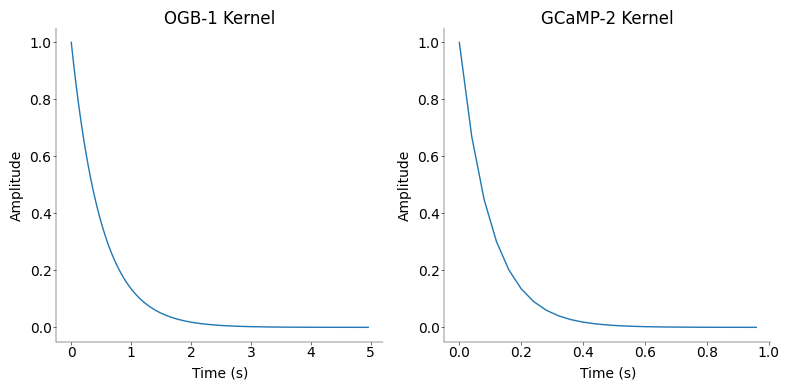

In [143]:
# plot the kernels
fig, axs = plt.subplots(1, 2, figsize=(8, 4))

axs[0].plot(t, ogb_kernel, label="OGB-1")
axs[0].set_title("OGB-1 Kernel")
axs[0].set_ylabel("Amplitude")
axs[0].set_xlabel("Time (s)")


axs[1].plot(t_2, gcamp_kernel, label="GCaMP-2")
axs[1].set_title("GCaMP-2 Kernel")
axs[1].set_ylabel("Amplitude")
axs[1].set_xlabel("Time (s)")


plt.tight_layout()
plt.show()

#### Plot the deconvolved OGB-1 signal

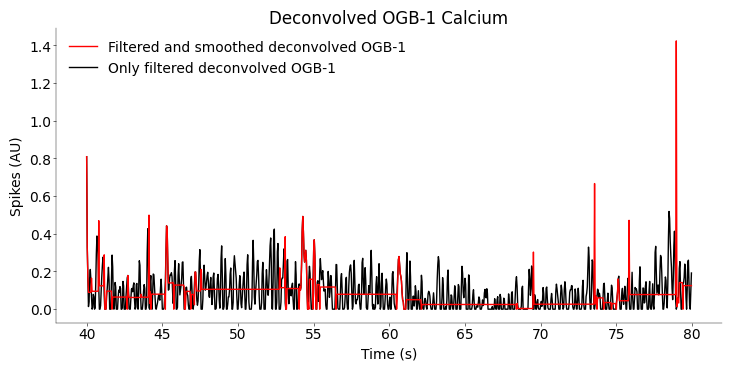

In [148]:
t = np.arange(40, 80, 1 / resample_rate)  # 20 seconds of data at 25 Hz
plt.plot(
    t,
    ogb_calcium_filtered_smoothed_deconv[0 : len(t)],
    label="Filtered and smoothed deconvolved OGB-1",
    color="red",
    linewidth=1,
    zorder=10,
)
plt.plot(
    t,
    ogb_calcium_filtered_deconv[0 : len(t)],
    label="Only filtered deconvolved OGB-1",
    color="black",
)

plt.title("Deconvolved OGB-1 Calcium")
plt.ylabel("Spikes (AU)")
plt.xlabel("Time (s)")
plt.legend()

#### Comparison of the deconvolved signal after filtering (and) smoothing with real spikes

/var/folders/g_/dvk6nf6n4w71vr5_mf4f1zdm0000gn/T/ipykernel_2029/709054341.py:45: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


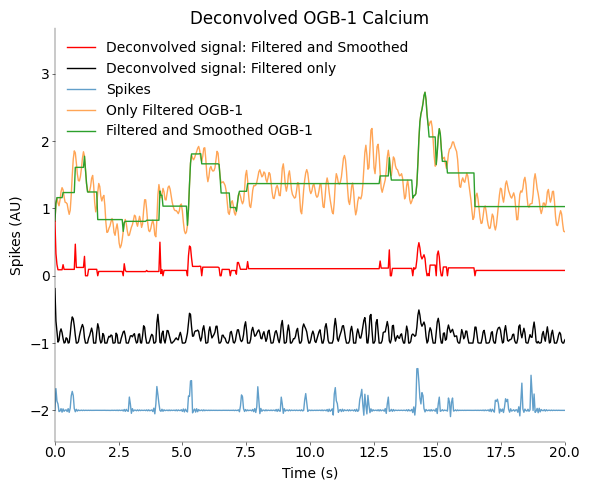

In [157]:
fig, ax = plt.subplots(figsize=(6, 5), layout="constrained")


ax.plot(
    timeline_ogb_resampled[: len(ogb_calcium_filtered_smoothed_deconv)],
    ogb_calcium_filtered_smoothed_deconv,
    label="Deconvolved signal: Filtered and Smoothed",
    zorder=10,
    color="red",
)

ax.plot(
    timeline_ogb_resampled[: len(ogb_calcium_filtered_deconv)],
    ogb_calcium_filtered_deconv - 1,
    label="Deconvolved signal: Filtered only",
    zorder=5,
    color="black",
)


ax.set_title("Deconvolved OGB-1 Calcium")
ax.set_ylabel("Spikes (AU)")
ax.set_xlabel("Time (s)")


ax.plot(
    timeline_ogb_resampled, ogb_spikes_resampled[:, 5] - 2, label="Spikes", alpha=0.7
)

ax.plot(
    timeline_ogb_resampled,
    ogb_calcium_filtered[:, 5],
    label="Only Filtered OGB-1",
    alpha=0.7,
)
ax.plot(
    timeline_ogb_resampled,
    ogb_calcium_filtered_smoothed,
    label="Filtered and Smoothed OGB-1",
    alpha=1,
)

plt.xlim(0, 20)
plt.legend()
plt.tight_layout()
plt.show()

#### Comparison of the deconvolved signal with smooted spikes

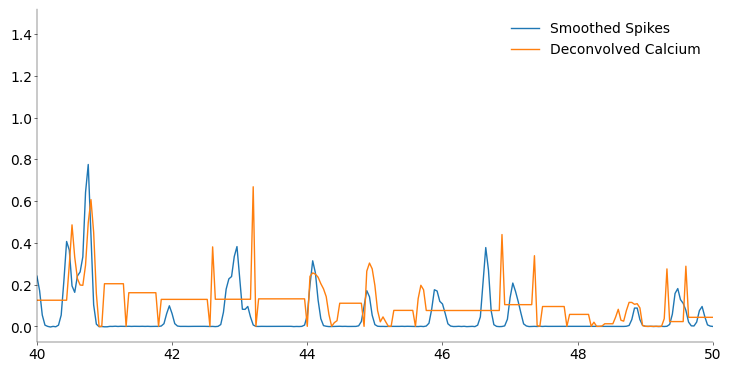

In [159]:
from scipy.ndimage import gaussian_filter1d

smoothed_spikes = gaussian_filter1d(ogb_spikes_resampled[:, 5], 1)

plt.plot(timeline_ogb_resampled, smoothed_spikes, label="Smoothed Spikes")
plt.plot(
    timeline_ogb_resampled[: len(ogb_calcium_filtered_smoothed_deconv)],
    ogb_calcium_filtered_smoothed_deconv,
    label="Deconvolved Calcium",
)
plt.xlim(40, 50)
plt.legend()

#### Plot the deconvolved GCAMP signal

/var/folders/g_/dvk6nf6n4w71vr5_mf4f1zdm0000gn/T/ipykernel_2029/1222174364.py:29: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


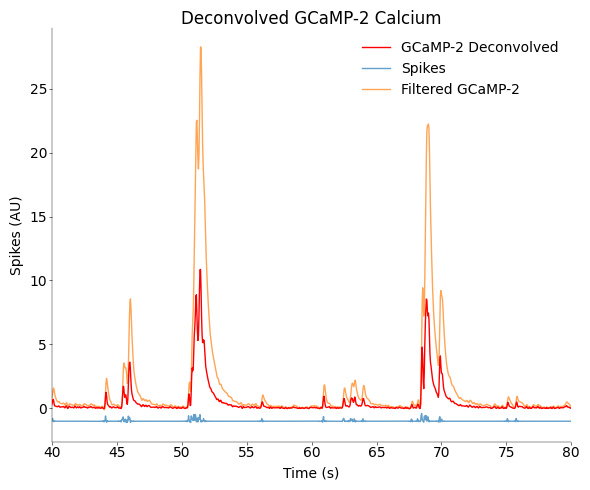

In [160]:
fig, ax = plt.subplots(figsize=(6, 5), layout="constrained")

ax.plot(
    timeline_gcamp_resampled[0 : len(gcamp_calcium_filtered_deconv)],
    gcamp_calcium_filtered_deconv,
    label="GCaMP-2 Deconvolved",
    zorder=10,
    color="red",
)
ax.set_title("Deconvolved GCaMP-2 Calcium")
ax.set_ylabel("Spikes (AU)")
ax.set_xlabel("Time (s)")
ax.set_xlim([40, 80])

ax.plot(
    timeline_gcamp_resampled,
    gcamp_spikes_resampled[:, 6] - 1,
    label="Spikes",
    alpha=0.7,
)

ax.plot(
    timeline_gcamp_resampled,
    gcamp_calcium_filtered[:, 6],
    label="Filtered GCaMP-2",
    alpha=0.7,
)
plt.legend()
plt.tight_layout()
plt.show()

NameError: name 'ogb_spikes_resampled_deconv' is not defined

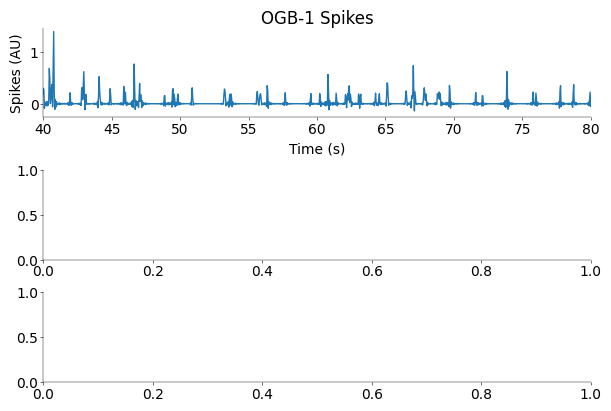

In [90]:
# --------------------------------------------------------------------------
# Compare true and deconvolved spikes rates for the OGB or GCamP Cell (1 pt)
# --------------------------------------------------------------------------

fig, axs = plt.subplots(
    3, 1, figsize=(6, 4), height_ratios=[1, 1, 1], gridspec_kw=dict(hspace=0)
)

axs[0].plot(timeline_ogb_resampled, ogb_spikes_resampled[:, 5], label="OGB-1")
axs[0].set_title("OGB-1 Spikes")
axs[0].set_ylabel("Spikes (AU)")
axs[0].set_xlabel("Time (s)")
axs[0].set_xlim([40, 80])

axs[1].plot(timeline_ogb_resampled, ogb_spikes_resampled_deconv, label="OGB-1")
axs[1].set_title("OGB-1 Deconvolved Spikes")
axs[1].set_ylabel("Spikes (AU)")
axs[1].set_xlabel("Time (s)")
axs[1].set_xlim([40, 80])


# OGB Cell

## Task 3: Run more complex algorithm

As reviewed in the lecture, a number of more complex algorithms for inferring spikes from calcium traces have been developed. Run an implemented algorithm on the data and plot the result. There is a choice of algorithms available, for example:

* Vogelstein: [oopsi](https://github.com/liubenyuan/py-oopsi)
* Theis: [c2s](https://github.com/lucastheis/c2s)
* Friedrich: [OASIS](https://github.com/j-friedrich/OASIS)

*Grading: 2 pts*



In [ ]:
# run this cell to download the oopsi.py file if you haven't already mannually downloaded it
# and put it in the same folder as this notebook
!wget https://raw.githubusercontent.com/liubenyuan/py-oopsi/master/oopsi.py

zsh:1: command not found: wget


In [161]:
import oopsi

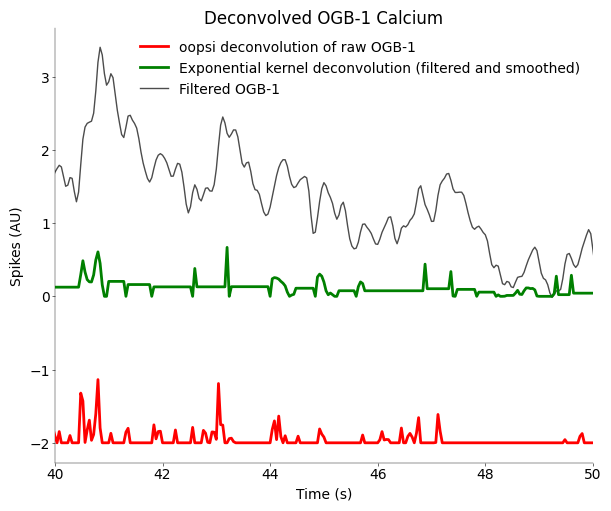

In [163]:
# --------------------------------------------------------------
# Apply one of the advanced algorithms on the OGB Cell (0.5 pts)
# --------------------------------------------------------------

# apply the oopsi algorithm to the ogb data
d, Cz = oopsi.fast(ogb_calcium_resampled[:, 5], dt=1 / resample_rate, iter_max=6)

# plot the results
fig, ax = plt.subplots(figsize=(6, 5), layout="constrained")

ax.plot(
    timeline_ogb_resampled,
    d - 2,
    label="oopsi deconvolution of raw OGB-1",
    zorder=10,
    color="red",
    linewidth=2,
)

ax.set_title("Deconvolved OGB-1 Calcium")
ax.set_ylabel("Spikes (AU)")
ax.set_xlabel("Time (s)")
ax.set_xlim([40, 50])

ax.plot(
    timeline_ogb_resampled[0 : len(ogb_calcium_filtered_smoothed_deconv)],
    ogb_calcium_filtered_smoothed_deconv,
    color="green",
    label="Exponential kernel deconvolution (filtered and smoothed)",
    alpha=1,
    linewidth=2,
    zorder=5,
)

ax.plot(
    timeline_ogb_resampled,
    ogb_calcium_filtered[:, 5],
    label="Filtered OGB-1",
    alpha=0.7,
    color="black",
)
plt.legend()

In [ ]:
# -------------------------------------------
# Plot the results for the OGB Cell (0.5 pts)
# -------------------------------------------

fig, axs = plt.subplots(
    3, 1, figsize=(6, 4), height_ratios=[1, 1, 1], gridspec_kw=dict(hspace=0)
)

# OGB Cell

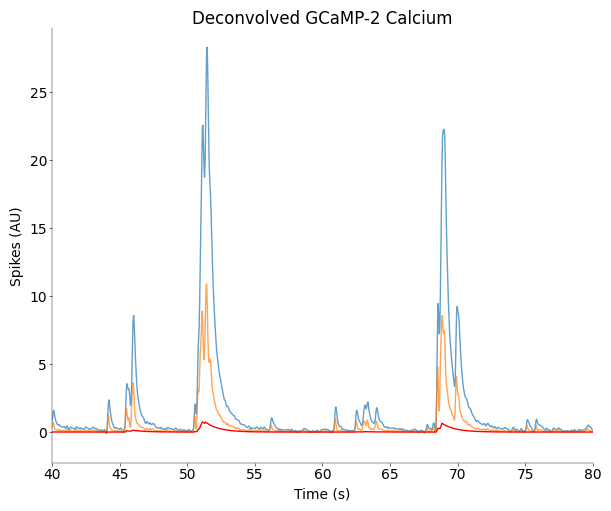

In [ ]:
# ----------------------------------------------------------------
# Apply one of the advanced algorithms on the GCamP Cell (0.5 pts)
# ----------------------------------------------------------------

# apply the oopsi algorithm to the gcamp data
d, Cz = oopsi.fast(gcamp_calcium_filtered[:, 6], dt=1 / resample_rate)

# plot the results
fig, ax = plt.subplots(figsize=(6, 5), layout="constrained")
ax.plot(
    timeline_gcamp_resampled, Cz, label="GCaMP-2 Deconvolved", zorder=10, color="red"
)
ax.set_title("Deconvolved GCaMP-2 Calcium")
ax.set_ylabel("Spikes (AU)")
ax.set_xlabel("Time (s)")
ax.set_xlim([40, 80])

ax.plot(
    timeline_gcamp_resampled, gcamp_calcium_filtered[:, 6], label="Spikes", alpha=0.7
)
ax.plot(
    timeline_gcamp_resampled[0 : len(gcamp_calcium_filtered_deconv)],
    gcamp_calcium_filtered_deconv,
    label="Filtered GCaMP-2",
    alpha=0.7,
)

In [ ]:
# ---------------------------------------------
# Plot the results for the GCamp Cell (0.5 pts)
# ---------------------------------------------

fig, axs = plt.subplots(
    3, 1, figsize=(6, 4), height_ratios=[1, 1, 1], gridspec_kw=dict(hspace=0)
)




# GCamP Cell

## Task 4: Evaluation of algorithms

To formally evaluate the algorithms on the two datasets run the deconvolution algorithm and the more complex one on all cells and compute the correlation between true and inferred spike trains. `DataFrames` from the `pandas` package are a useful tool for aggregating data and later plotting it. Create a dataframe with columns

* algorithm
* correlation
* indicator

and enter each cell. Plot the results using `stripplot` and/or `boxplot` in the `seaborn` package.

*Grading: 3 pts*


Evaluate on OGB data

In [ ]:
# -------------------------------------------------
# Create dataframe for OGB Cell as described (1 pt)
# -------------------------------------------------

Create OGB dataframe

In [ ]:
df_ogb = pd.DataFrame({"algorithm": algo, "correlation": c, "indicator": indicator})
df_ogb.head()

Evaluate on GCamp data

In [ ]:
# ---------------------------------------------------
# Create dataframe for GCamP Cell as described (1 pt)
# ---------------------------------------------------

Create GCamp dataframe

In [ ]:
df_gcamp = pd.DataFrame({"algorithm": algo, "correlation": c, "indicator": indicator})
df_gcamp.head()

Combine both dataframes and plot

In [ ]:
# ---------------------------------------------------------------------------
# Create Strip/Boxplot for both cells and algorithms Cell as described (1 pt)
# hint: you can seperate the algorithms by color
# ---------------------------------------------------------------------------